In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
data=pd.read_csv('/content/Google-Playstore.csv')

<ipython-input-21-d53fecb57a5c>:1: DtypeWarning: Columns (20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/Google-Playstore.csv')


In [ ]:
df=pd.DataFrame(data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215053 entries, 0 to 215052
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   App Name           215052 non-null  object 
 1   App Id             215053 non-null  object 
 2   Category           215053 non-null  object 
 3   Rating             212952 non-null  float64
 4   Rating Count       212952 non-null  float64
 5   Installs           215038 non-null  object 
 6   Minimum Installs   215038 non-null  float64
 7   Maximum Installs   215053 non-null  int64  
 8   Free               215053 non-null  bool   
 9   Price              215053 non-null  float64
 10  Currency           215028 non-null  object 
 11  Size               215038 non-null  object 
 12  Minimum Android    214436 non-null  object 
 13  Developer Id       215052 non-null  object 
 14  Developer Website  144452 non-null  object 
 15  Developer Email    215051 non-null  object 
 16  Re

In [ ]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [ ]:
df.shape

(215053, 24)

In [ ]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,212952.000000,2.129520e+05,2.150380e+05,2.150530e+05,215053.000000
mean,2.202873,2.609836e+03,1.775935e+05,2.930703e+05,0.092754
std,2.107092,1.331607e+05,1.249038e+07,1.648505e+07,1.810658
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,5.000000e+01,8.300000e+01,0.000000
50%,2.900000,6.000000e+00,5.000000e+02,6.990000e+02,0.000000
75%,4.300000,4.300000e+01,5.000000e+03,7.440000e+03,0.000000
max,5.000000,3.747901e+07,5.000000e+09,6.156519e+09,399.990000


In [ ]:
df.isnull().sum()

,0
App Name,1
App Id,0
Category,0
Rating,2101
Rating Count,2101
Installs,15
Minimum Installs,15
Maximum Installs,0
Free,0
Price,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df=df.fillna(5)

<ipython-input-29-56db23e35229>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.fillna(5)


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
y=df['Rating']

In [ ]:
x=df.drop('Rating',axis=1)

In [ ]:
x.columns

Index(['App Name', 'App Id', 'Category', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [ ]:
y

,Rating
0,0.0
1,4.4
4,0.0
5,0.0
9,4.7
...,...
215047,5.0
215048,5.0
215049,4.6
215050,0.0


In [ ]:
oh = OneHotEncoder(sparse_output=False)

# Reshape the 'Gender' column as it expects 2D array
diet_reshaped = df['Editors Choice'].values.reshape(-1, 1)

# Apply OneHotEncoder
encoded_diet = oh.fit_transform(diet_reshaped)

# Convert the result to a DataFrame with integer values (0 and 1)
encoded_diet_df = pd.DataFrame(encoded_diet, columns=oh.categories_[0], dtype=int)

# The DataFrame now has only two columns:
df = pd.concat([df, encoded_diet_df], axis=1)

In [ ]:
encoded=oh.fit_transform(x,[['App Name', 'App Id', 'Category', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time']])
encoded_df=pd.DataFrame(encoded,columns=oh.get_feature_names_out())
encoded_df.columns

Index(['App Name_!go Gmina Siedlce', 'App Name_"ColorPopUp-Dinosaur"',
       'App Name_"FAITH" by The Texas Guardians', 'App Name_"FORE" Business',
       'App Name_"KazMunaiGas" GS Network',
       'App Name_"أكل سريع تحضير “بدون إنترنت', 'App Name_# storm Area 51',
       'App Name_#10 - Réseau Social 100% Football', 'App Name_#392GO',
       'App Name_#Bible: Verse of the Day',
       ...
       'Scraped Time_2021-06-15 23:59:01', 'Scraped Time_2021-06-15 23:59:02',
       'Scraped Time_2021-06-15 23:59:03', 'Scraped Time_2021-06-15 23:59:04',
       'Scraped Time_2021-06-15 23:59:05', 'Scraped Time_2021-06-15 23:59:06',
       'Scraped Time_2021-06-15 23:59:07', 'Scraped Time_2021-06-15 23:59:08',
       'Scraped Time_2021-06-15 23:59:09', 'Scraped Time_2021-06-15 23:59:10'],
      dtype='object', length=629549)

In [ ]:
df.columns

In [ ]:
num_columns=df.select_dtypes(include='number').columns

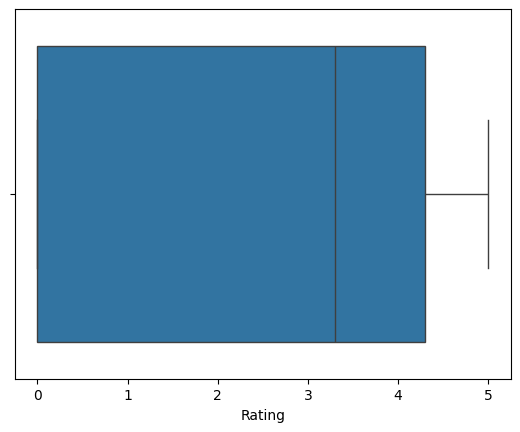

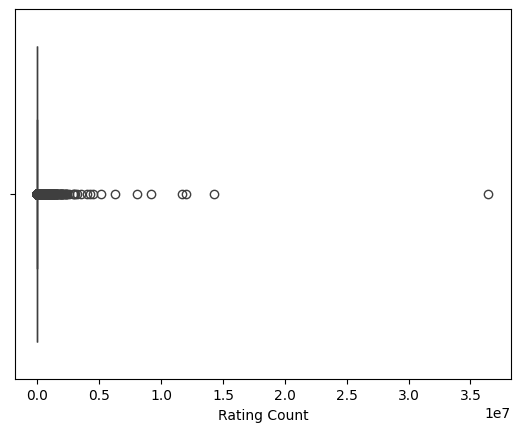

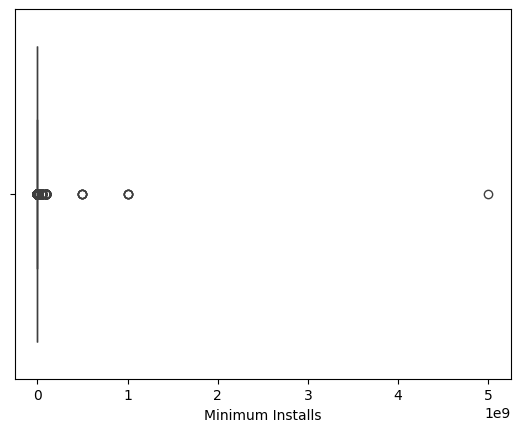

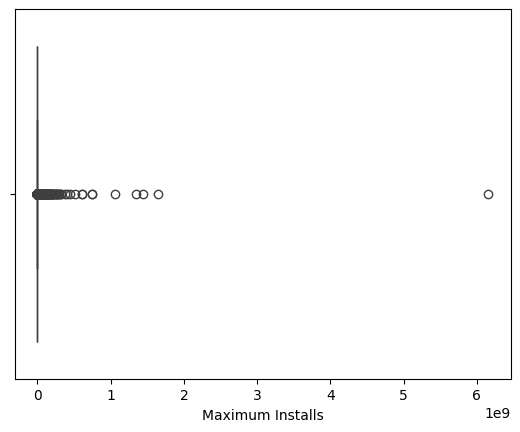

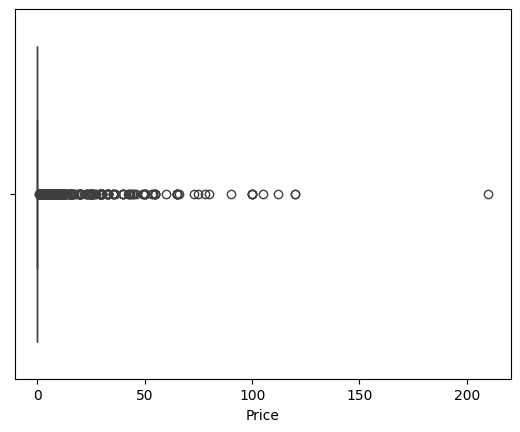

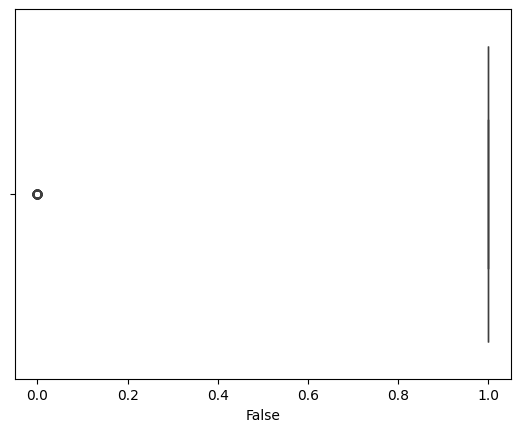

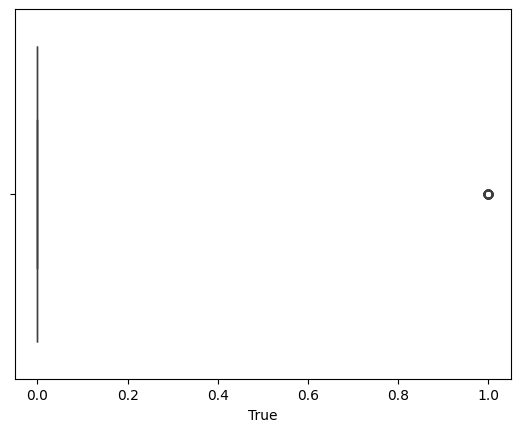

In [ ]:
for column in num_columns:
  sns.boxplot(data=df,x=column)
  plt.show()

In [ ]:
def handling_outlires(df):
  for col in df.select_dtypes(include='number').columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df[col]=df[col].apply(lambda x:upper_bound if x>upper_bound else x)
  return df

<Axes: >

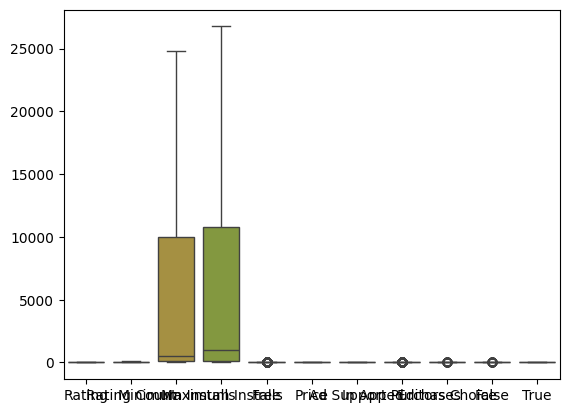

In [ ]:
df1=handling_outlires(df)
df1.head()
sns.boxplot(df1)

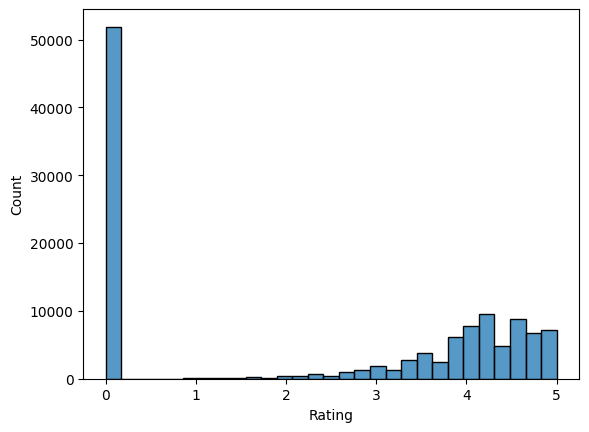

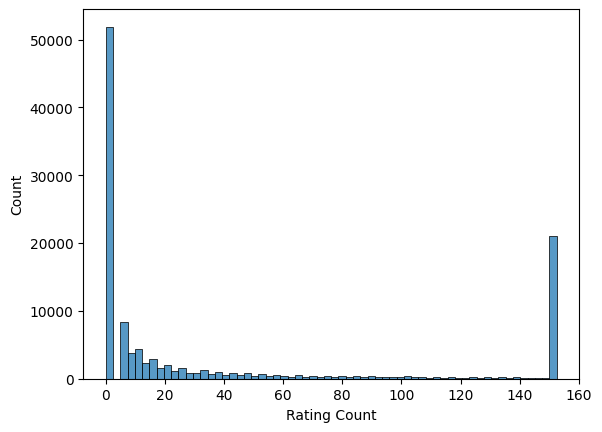

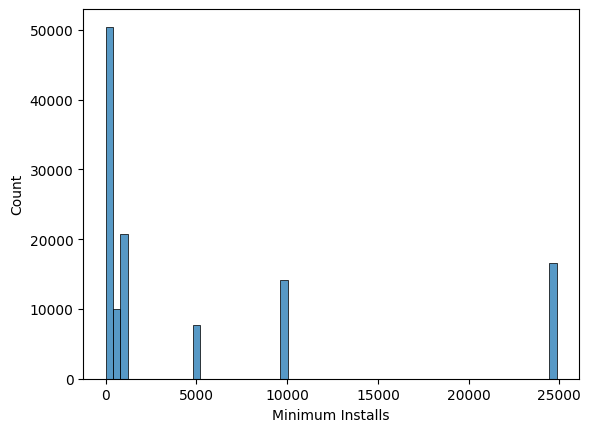

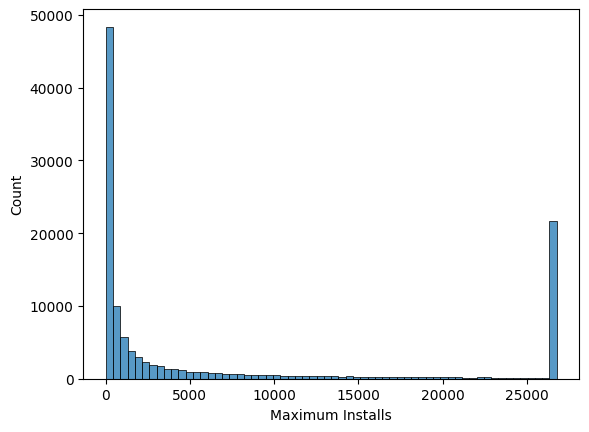

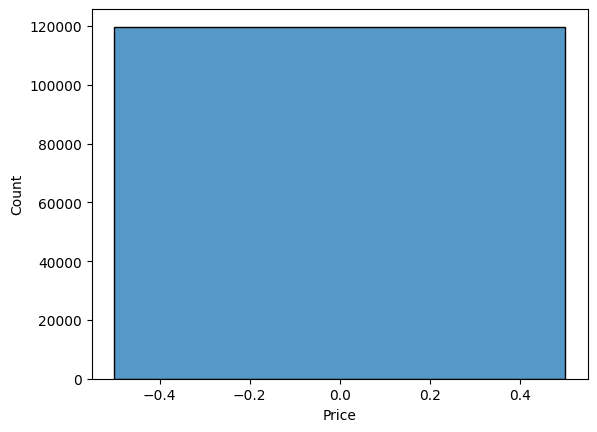

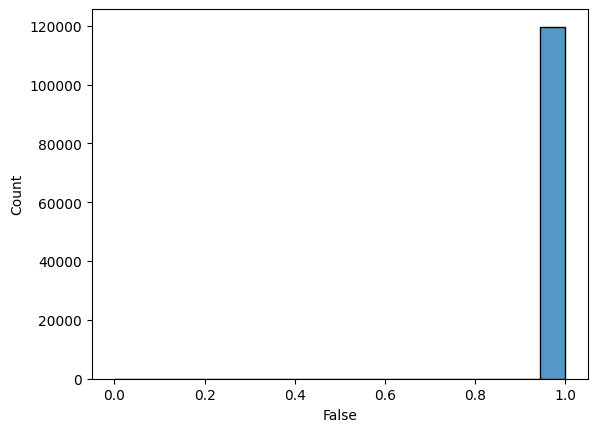

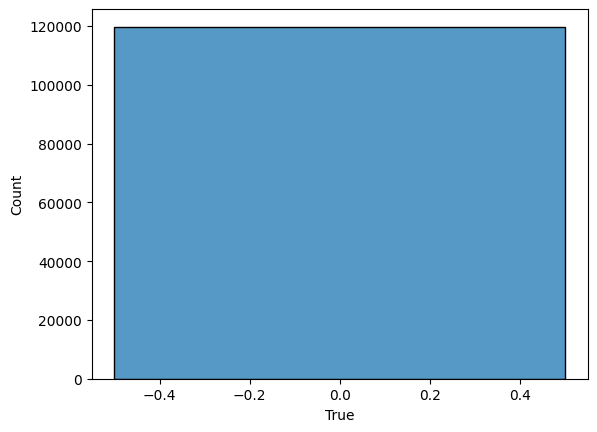

In [ ]:
for column in num_columns:
  sns.histplot(data=df,x=column)
  plt.show()

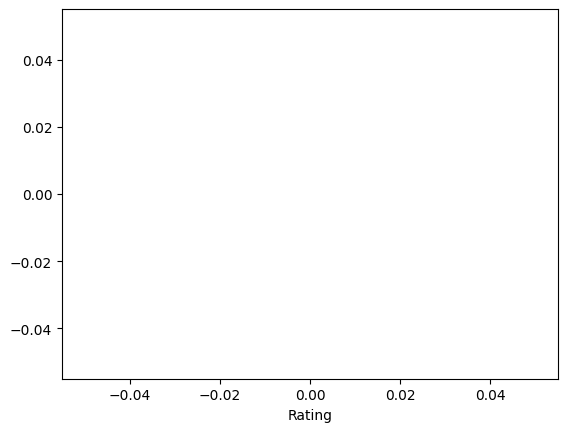

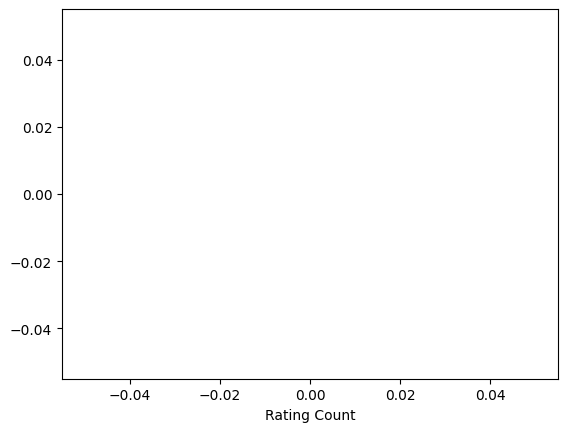

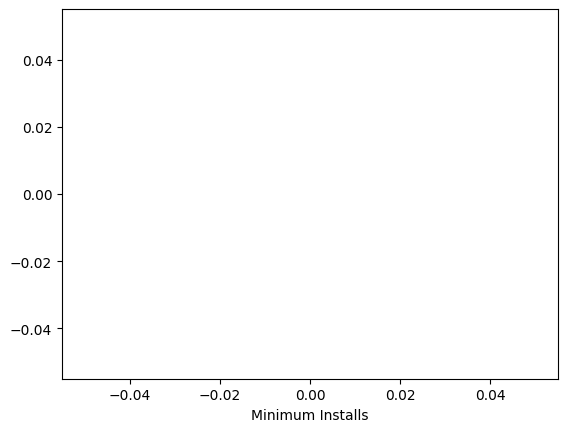

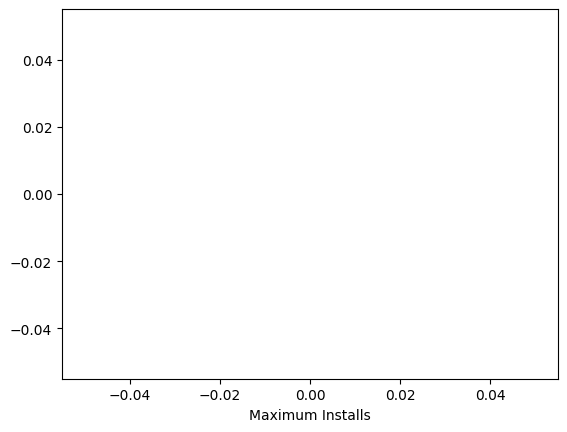

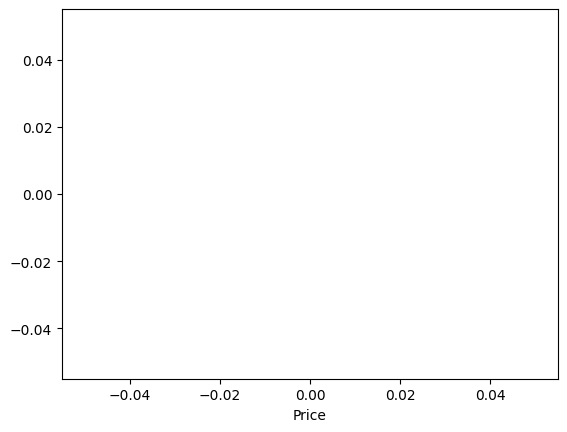

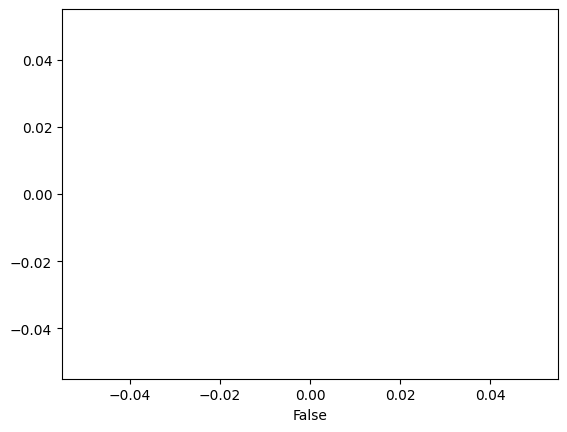

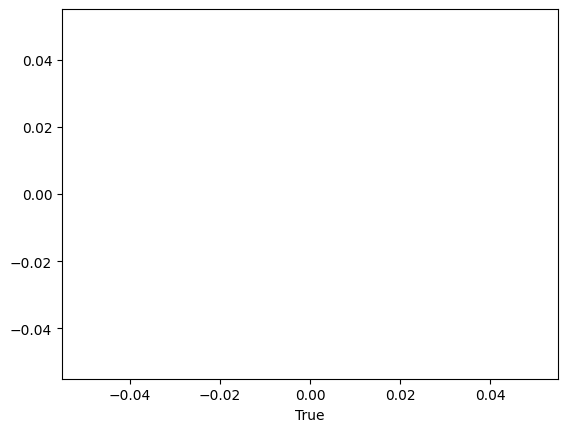

In [ ]:
for column in num_columns:
  sns.scatterplot(data=df,x=column)
  plt.show()

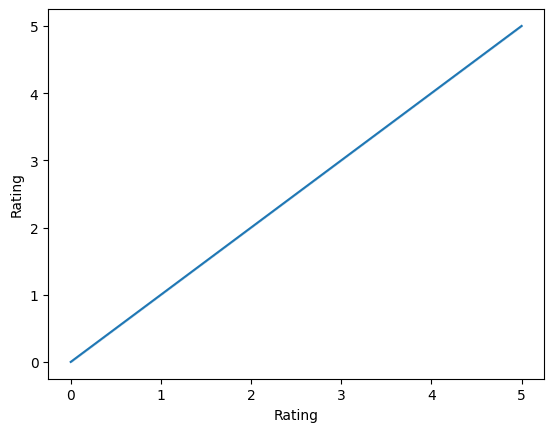

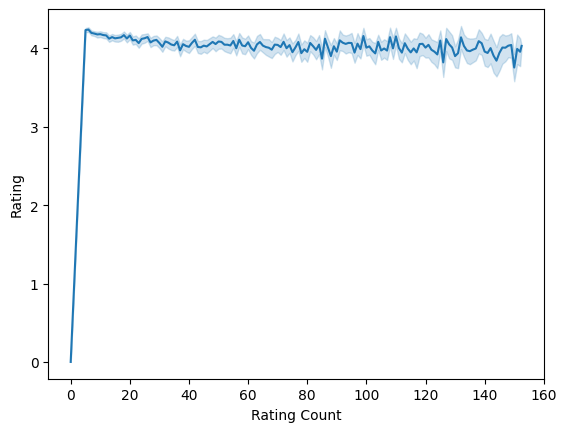

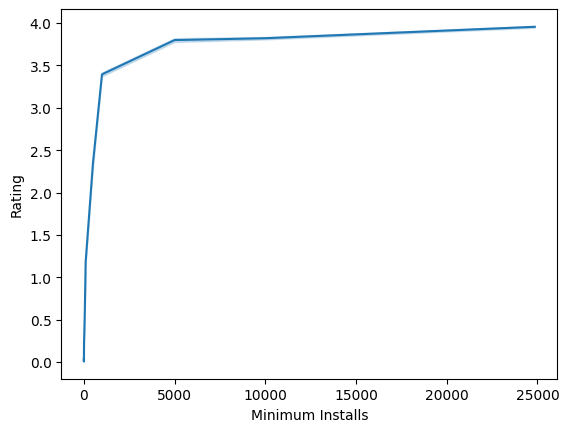

KeyboardInterrupt: 

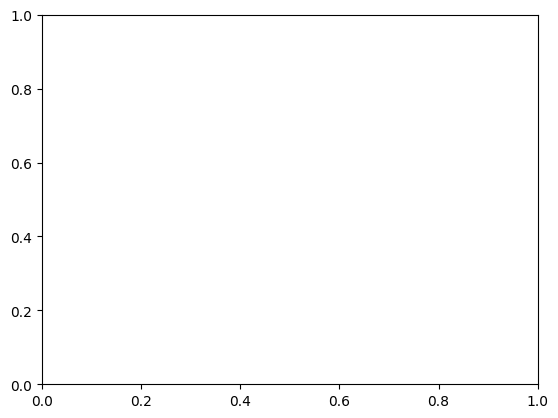

In [ ]:
for column in num_columns:
  sns.lineplot(data=df, x=column, y=df[num_columns[0]])
  plt.show()

In [ ]:
for column in num_columns:
  sns.boxplot(data=df,x=column)
  plt.show()

In [ ]:
for column in num_columns:
  sns.violinplot(data=df,x=column)
  plt.show()

In [ ]:
df1.select_dtypes(include=np.number).skew()

,0
Rating,-0.112492
Rating Count,1.190469
Minimum Installs,1.606477
Maximum Installs,1.191175
Price,0.000000
False,-44.271337
True,0.000000


In [ ]:
from sklearn.preprocessing import StandardScaler



In [ ]:
ss=StandardScaler()

In [ ]:
x=df.drop('Rating',axis=1)
y=df['Rating']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(138180, 25)
(34545, 25)
(138180,)
(34545,)


In [ ]:
numerical_features = x_train.select_dtypes(include=['number']).columns
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[numerical_features])
x_test_scaled = scaler.transform(x_test[numerical_features])

TypeError: Feature names are only supported if all input features have string names, but your input has ['bool', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [ ]:
# Convert all column names to strings
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

# Now proceed with scaling
numerical_features = x_train.select_dtypes(include=['number']).columns
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[numerical_features])
x_test_scaled = scaler.transform(x_test[numerical_features])

In [ ]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [ ]:
print("\n Training models,")
models={'Linear Regression':LinearRegression(),'Decision Tree':DecisionTreeRegressor(),'Random Forest':RandomForestRegressor(random_state=42),'DT':DecisionTreeRegressor(),'Gradient Boosting':GradientBoostingRegressor(random_state=42),'SVR':SVR()}



 Training models,


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
resuilt={}
for name,model in models.items():
  model.fit(x_train_scaled,y_train)
  y_pred=model.predict(x_test_scaled)
  r2=r2_score(y_test,y_pred)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.impute import SimpleImputer
# Create an imputer to fill NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
x_train_imputed = imputer.fit_transform(x_train_scaled)
x_test_imputed = imputer.transform(x_test_scaled)

resuilt={}
for name,model in models.items():
  # Fit the model using the imputed data
  model.fit(x_train_imputed,y_train)
  y_pred=model.predict(x_test_imputed)  # Predict using imputed test data
  r2=r2_score(y_test,y_pred)

ValueError: Input contains NaN.

In [ ]:
from sklearn.impute import SimpleImputer
# Create an imputer to fill NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
x_train_imputed = imputer.fit_transform(x_train_scaled)
x_test_imputed = imputer.transform(x_test_scaled)

# Impute NaN values in y_train and y_test
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1))

# Reshape back to 1D array
y_train_imputed = y_train_imputed.ravel()
y_test_imputed = y_test_imputed.ravel()

resuilt={}
for name,model in models.items():
  # Fit the model using the imputed data
  model.fit(x_train_imputed,y_train_imputed)
  y_pred=model.predict(x_test_imputed)  # Predict using imputed test data
  r2=r2_score(y_test_imputed,y_pred) # Use imputed y_test for R2 calculation

In [ ]:
results = {
    "MAE": mean_absolute_error(y_test, y_pred),
    "MSE": mean_squared_error(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    "R2": r2_score(y_test, y_pred)
}
print(results)

NameError: name 'mean_absolute_error' is not defined

In [ ]:
print("\nModel Performance:")
for model_name, metric_value in results.items():
  print(f"\n{model_name}: {metric_value:.4f}")


Model Performance:


NameError: name 'results' is not defined